<a href="https://colab.research.google.com/github/Briskwoods/Machine-Learning-Groupwork-Task-1/blob/master/AI_CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Housing prices from California Housing Dataset.
### The documnentation is divided into five main sections:


*   Data Preprocessing
*   Model Identification
*   Cross Validation
*   Hyperparamter Tuning
*   Model Selection







## 1. Data Preprocessing


### *Step One: Importing dataset and libraries*
### The dataset is loaded using the fetch function, from sklearn model libraries.

### A brief description of the data is also seen below

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [37]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [44]:
cal_housing = fetch_california_housing()
data = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
target = pd.DataFrame(cal_housing.target)

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### *Step two: Checking for Missing*
We have to check the datset to see if there are any missing values (Usually represented as NaN)
We can then choose to either:

*   Drop missing Values
*   Fill missing Values




In [3]:
null_columns = data.columns[data.isna().any()]
data[null_columns].isna().sum()

null_columns
#CHECKING FOR NULL VALUES

Index([], dtype='object')

No missing values were present in this data set so we proceed to the next step.

### *Step three: Feature Selection*
Next we need to understand how features in a dataset interact with each other. 
Correlation shows the relationship between the eight features of our dataset. It can either be positive or negative.

Highly correlated variables are avoided when creating models since they tend to skew the output leading to "noise that can otherwise led to an inaccurate model.

To check for correlated features we used a *Correlation Matrix.*
Each feature is listed on both axis and the yellow encoded ones show high correlation while the green ones show no correlation.
For those that indicate high correlation, we can drop either one of the two feaures being compared.



In [4]:
#feature selection
def plot_corr(data, size = 10):
  corr = data.corr()
  fig, ax = plt.subplots(figsize = (size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

  plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

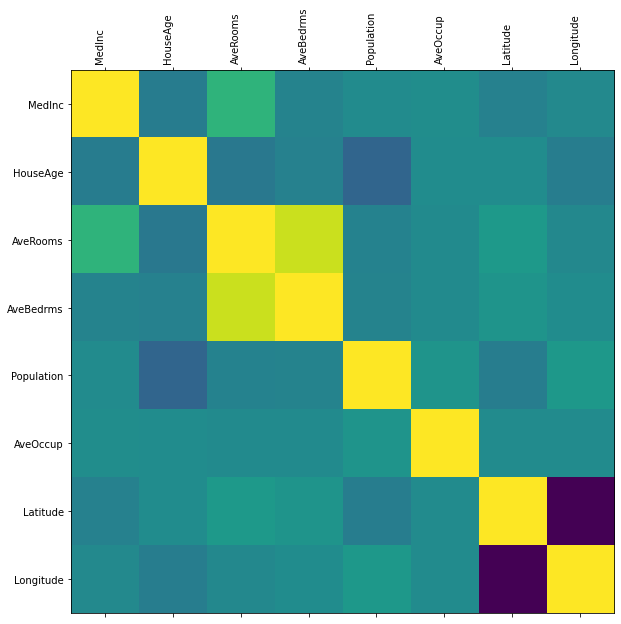

In [5]:
plot_corr(data)

From the above matrix, we can choose either drop  average bedrooms and average rooms as they both have the same outcome on the price prediction.

### *Step four: Feature Extraction* 

In [7]:
X = data.copy()
y = target.copy()
X_ts = PowerTransformer().fit_transform(X)
y_ts = PowerTransformer().fit_transform(y)

In [8]:
pca_with_varia =PCA(0.9)
pca_with_varia.fit_transform(X_ts)
pca_with_varia.n_components_

6

In [10]:
pca = PCA(n_components = 6)
pc_s = pca.fit_transform(X_ts)
pca_data = pd.DataFrame(pc_s, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
target_data = pd.DataFrame(y_ts, columns =['MedVal'])
final_data = pd.concat([pca_data, target_data],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,PC6,MedVal
0,2.339323,-1.029495,-1.833506,1.084577,-0.396658,-0.097847,1.715878
1,1.621925,-1.619071,0.372829,1.298967,1.685856,-0.828197,1.281389
2,2.333480,-1.056456,-1.692510,0.923991,-1.248685,-0.901860,1.247506
3,2.165364,0.052684,-1.376361,0.622079,-0.652495,-0.908222,1.188835
4,2.335353,0.364186,-1.407326,-0.037753,-0.368808,-0.930169,1.193798
...,...,...,...,...,...,...,...
20635,1.689388,0.977962,0.783628,-1.185460,-0.217468,0.618733,-1.414289
20636,1.970410,-0.406708,0.368609,-1.587568,-1.236878,1.314569,-1.433165
20637,1.708682,0.531152,1.023623,-1.274410,0.422943,0.785039,-1.160803
20638,1.981453,0.391902,0.559898,-1.671838,0.485431,0.748382,-1.293200


### *Step Six: Using Seaborn to illustrate the distributions of the features.*
The pair plots allow us to see both distribution of single variables and rlationships between the features.

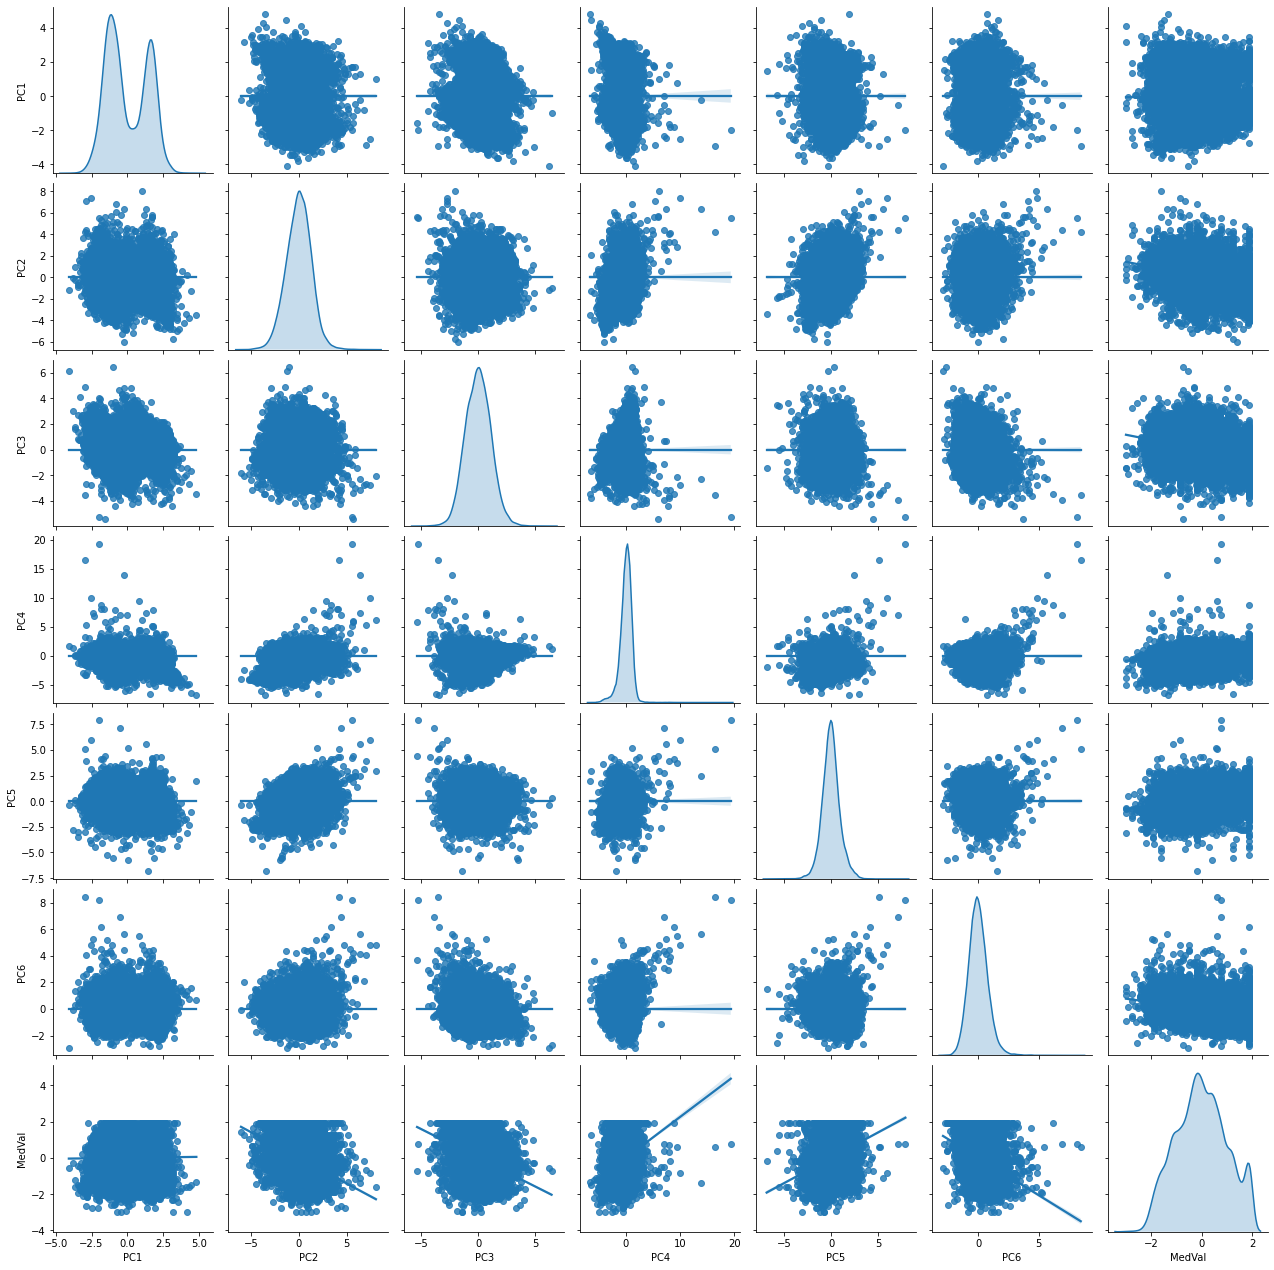

In [42]:
sns.pairplot(final_data,kind='reg',diag_kind='kde')

In [11]:
final_data_array = final_data.to_numpy()

In [12]:
all_features = list(final_data.columns)
all_features
X_2 = final_data.loc[:,all_features[0]:all_features[-2]].values
y_2 = final_data.loc[:,[all_features[-1]]].values

### *Step Six: Split Train and Test data*

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2,test_size = 0.2, random_state=0)

# 2. Model Identification

We choose the four most common regression models to use for predicting house prices.
They work well in cases of high dimensionality and multicollinearity among the variables in the dataset.
The models include:

*   Linear Regression
*   Lasso Regression
*   Ridge Regression
*   ElasticNet Regression



In [14]:
result = {}
models = {'LinearRegression':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge(),
          'ElasticNet':linear_model.ElasticNet()}

for i in models:
  models[i].fit(X_train,y_train)
  accuracy = models[i].score(X_test,y_test)
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.471718,-0.000208,0.471719,-0.000208


#3. Cross Validation

Once the models have been trained we would like to measure their accuracy.

The above models use an error metric to determine the accuracy of the model. However, its not very reliable as the accuracy obtained for one test can be very different to the accuracy obtained for a different test-set.

***K-fold Cross Validation*** provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point.

In [15]:
kfold = KFold(n_splits=4)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.50366,-0.000059,0.50366,-0.000059


The accuracy of the models increase by 3%.
But what if we increased the number of k-folds?

In [40]:
kfold_Large = KFold(n_splits=90)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold_Large)
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.498286,-0.005534,0.498286,-0.005534


The performance of the model, in terms of accuracy decreases.

As ***k*** gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller thus accuracy of the models reduce.


# 4. Hyperparameter Tuning

After seeing hoew the model is performing, we wouldlike optimise some of the hyperparamters of the model.
Some of the hyperparameters ( depending on the model)  include but are not limited to:

*   Size of hashing space
*   Number of decision trees
*   Depth of the decsion trees
*   Learning rate
*   Number of Iterations




The purpose of tuning the hyperparameters is to find the set of hyperparameters leading to the lowest error on the validation set.

We decided to employ Random Search, which randomly samples the search space instead of disicretizing it a Cartesian Grid.
It is cost effect in terms of it using a sample of hyperparameters and not the whole space.

In [67]:
for i in models:
  regressor = models[i]
  if i == 'Ridge':
    alpha_space = np.logspace(-4, 0.5, 50)
    ridge_params = {'alpha':alpha_space}
    random = RandomizedSearchCV(regressor,param_distributions=ridge_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params for Ridge Regression are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  elif i == 'ElasticNet':
    l1_space = np.linspace(0, 1, 30)
    elastic_params = {'l1_ratio': l1_space}   
    random = RandomizedSearchCV(regressor,param_distributions=elastic_params,cv=3,n_jobs=-1,refit=True)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params for Elastic Net are ", results.best_params_)
    accuracy = results.score(X_test,y_test)   
  elif i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}   
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1,refit=True)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params for Lasso Regression are ", results.best_params_)
    accuracy = results.score(X_test,y_test) 
    
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)  

0.5014360345943071
Best Params for Lasso Regression are  {'tol': 1e-06, 'max_iter': 1100, 'alpha': 0.02}
0.5035794714769699
Best Params for Ridge Regression are  {'alpha': 2.5595479226995383}
0.3648105604276477
Best Params for Elastic Net are  {'l1_ratio': 0.034482758620689655}


,LinearRegression,Lasso,Ridge,ElasticNet
0,0.50366,0.470899,0.47172,0.343909


We ran hyperparameter tuning and Cross Validation to test the accuracy of the models.
We also output the best parameters to maintain for each model.

# 5.Model Selection